# First jupyter notebook

1. First steps: [DataCamp tutorials](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
2. Jupiter uses markdown: [Some tutorial](https://commonmark.org/help/)

## Install conda extension

1. Run terminal
2. In (base) environment run: *conda install nb_conda*



# Preparation of the environment

## Conda environment

1. Run terminal
2. Create new environment: *conda create -n lab2*
3. Activate environment: *conda activate lab2*
3. Install pakages:

   - numpy: for operations on an array of numbers
   - scipy: image processing functions
   - pillow (PIL): opening image files, image processing functions 
     > *conda install -c anaconda numpy scipy pillow* 
   - matplotlib: displaying images on the screen
     > *conda install -c conda-forge matplotlib*
   - ipykernel: jupyter's packages
     > *conda install -c anaconda ipykernel*

## Date

1. Go to page: [ImageProcessingPlace](http://imageprocessingplace.com/root_files_V3/image_databases.htm).
2. Download zip file - fifth (5) row of the table.
3. Create a directory on the disk and extract the images to it.

## Runnig jupyter

1. Start a terminal or deactivate an environment other than 'base' if it is running
2. In the 'base' environment, run:
    > jupyter notebook
3. In the opened browser window, go to the directory in which you will work (with images downloaded from the Internet).
4. Click 'New' in the upper right corner of the window and select the 'lab2' environment. A new notebook window will open.

## Changing the notebook name

1. A notebook file has been created in the working directory: *Untitled.ipynb*
2. Close notepad: menu *File / Close and Halt*
3. In the file browser jupiter window will know the notebook file and click the 'rename' icon in the top menu
4. Rename the notebook file.
5. Launch the notebook by clicking it.

# Raster data

## Basic modules

1. *numpy*:

2. *Matplotlib*: is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms: [matplotlib](http://matplotlib.org/index.html)

3. *PIL* (pillow): the Python Imaging Library (PIL)} adds image processing capabilities to your Python interpreter. This library supports many file formats, and provides 
     powerful image processing and graphics capabilities: [PIL](http://www.pythonware.com/products/pil/)


## Raster image

*Array raster*:  grid of squares called pixels. Each pixel contains a number that determines its brightness. The basic range of numbers is 0 to 255 or 8 bits. Image model as  *numpy array*

1. Import modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

2. Create an array of random numbers from 0 to 255 and display as an image:

In [2]:
np.random.seed(5555)  # set seed, always the same results of randoming
ar = np.random.randint(0,255,(10,10),dtype=np.uint8)
print(ar)
print(f'\narray.shape: {ar.shape}\narray.dtype: {ar.dtype}')

[[ 74 180 174 142  12 127  66  43  29 211]
 [176 138 194 112  36 131 218 238 119 143]
 [222 157  97 235 115 231 205  97  59 218]
 [ 18 208 244 124  30 245 123 116  32 242]
 [101 147 216  80 224 155  45 204 180  95]
 [189 236  69 144 132  35 252 174 238 248]
 [199 147 250 136 235 252 219 151   0 168]
 [ 77  88  70 181 112  67   2  21 199 247]
 [ 83 174 113  80  66   9  31  41 154 104]
 [  5   8 216 159 127  45  75 198 173  18]]

array.shape: (10, 10)
array.dtype: uint8


3. Displaying the array as an image:
   - in the default colors of matplotlib
   - in gray colors

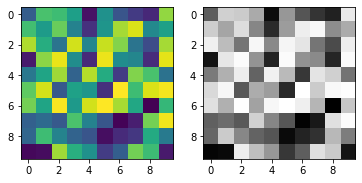

In [3]:
plt.subplot(1,2,1)
plt.imshow(ar)     # default colors of matplotlib
plt.subplot(1,2,2)
plt.imshow(ar, cmap=plt.cm.Greys_r); # gray colors

## Playing with spatial resolution

### Creating 3 single-channel images:

 - 20 x 20 pixels
 - 50 x 50 pixels
 - 500 x 500 pixels

1. Creating 3 arrays:

In [4]:
r20 =np.random.randint(0,255,(20,20),dtype=np.uint8)
r100 =np.random.randint(0,255,(100,100),dtype=np.uint8)
r500 =np.random.randint(0,255,(500,500),dtype=np.uint8)

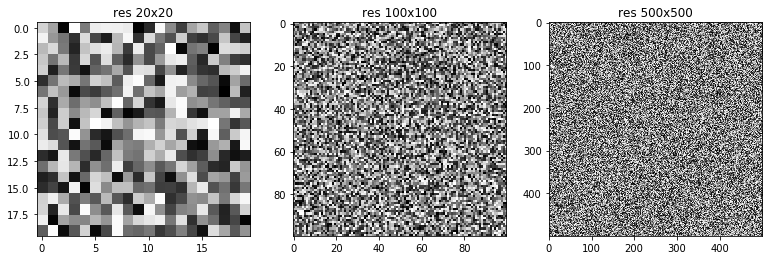

In [5]:
# list of image titles
tit = ['res 20x20','res 100x100','res 500x500']
f = plt.figure(figsize=(13,18))
plt.gray() # grayscale display mode

for i,img in enumerate([r20,r100,r500],1):
    plt.subplot(1,3,i)  # 2 images: one row, two columns, i - image number from 1
    plt.imshow(img)
    plt.title(tit[i-1])

### Draw a circle
    
    - adding a circle drawing to each image:  
    - middle in the center of the image
    - 30% radius of the image size
    - circle equation:
$$ rr = (x^2 + y^2)^{0.5} $$

    - conditions determining the ring area - the outer area, the ring area, the inner area:
        - outside the ring: rr > r_out
        - inside the ring: rr <= r_in
        - ring: (rr > r_in) and (rr <= r_out)
    
    - where:
        - rr: value of the calculated circle function
        - r_out: outer radius of the ring
        - r_in: inner radius of the ring

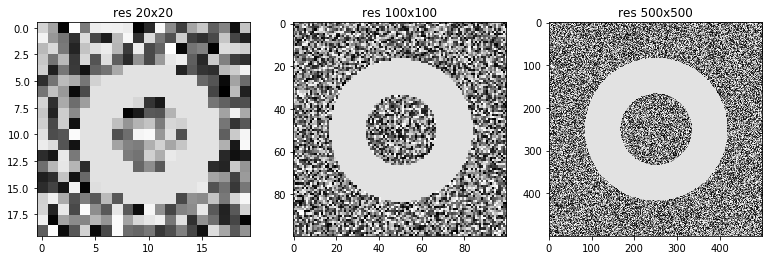

In [6]:
f = plt.figure(figsize=(13,18)) # set size of figure in inches

for i,img in enumerate([r20,r100,r500],1):
    s = int(img.shape[0]/2)     # calculate half the image dimension
    x,y = np.arange(-s,s), np.arange(-s,s) #calculate the range of coordinates x and y: from - s to s
    x1,y1 = np.meshgrid(x,y)    # calculate the x and y coordinate grids
    rr = (x1**2 + y1**2)**0.5   
    img[(rr>s/3) & (rr<(2*s)/3)] = 225
    
    plt.subplot(1,3,i)  # 2 images: one row, two columns
    plt.imshow(img)
    plt.title(tit[i-1])
del img

## Three channels and colors

To create the 'rgb' image, the above created 500x500 image will be used. The resulting image should be assigned colors:
- gray background, with colors: red = 125, green = 125, blue = 125
- red color of ring: red = 255, green = 0, blue = 0
- yellow the center of the ring: red = 255, green = 255, blue = 0

stages:
- copy the r500 image as 3 channels: r500 (red), g500 (green), b500 (blue)
- assign each channel the appropriate values according to the condition from **Draw a circle** point.


In [7]:
s = int(r500.shape[0]/2)
x,y = np.arange(-s,s), np.arange(-s,s)
x1,y1 = np.meshgrid(x,y)
rr = (x1**2 + y1**2)**0.5

g500 = r500.copy()
b500 = r500.copy()

# set background color
for img in [r500,g500,b500]:
    img[rr>(2*s)/3] = 125
del img    

# set ring color
ring = [255,0,0]
for i,img in enumerate([r500,g500,b500]):
    img[(rr>s/3) & (rr<=(2*s)/3)] = ring[i]
del img  

# set color of the center of the ring
center = [255,255,0]
for i,img in enumerate([r500,g500,b500]):
    img[rr<=s/3] = center[i]
del img  


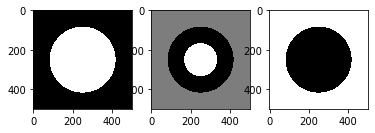

In [8]:
for i,img in enumerate([r500,g500,b500],1):
    plt.subplot(1,3,i)  # 2 images: one row, two columns
    plt.imshow(img)
del img

x_size: 500, y_size500, bands: 3


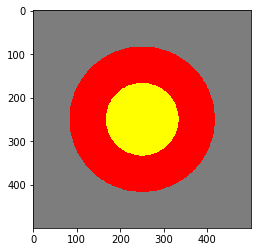

In [9]:
img = np.stack([r500,g500,b500],axis=-1)
print('x_size: {}, y_size{}, bands: {}'.format(*img.shape))
plt.imshow(img, cmap = plt.cm.brg_r);

## Pillow - saving and opening images

Create and save the image with an ellipse.

### Create an array of random numbers as an image:
   - array shape: 300 x 300
   - data type: *np.uint8* from 0 to 255
   - data from normal distributtion

Image background description:
             object type:  <class 'numpy.ndarray'>
               data type:  uint8
                   shape:  (300, 300)


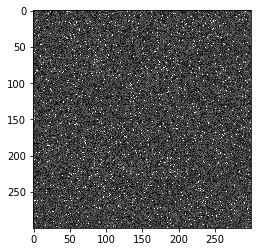

In [10]:
np.random.seed(9999)  # set seed, always the same results of randoming
im = np.random.normal(loc=50,scale=25,size=(300,300)).astype(np.uint8)
im_back = im.copy() # image background, for comparison of hsitograms, below
i = [type(im_back),im_back.dtype,im_back.shape]
print('Image background description:')
print(f'{"object type:":>25}  {i[0]}\n{"data type:":>25}  {i[1]}\n{"shape:":>25}  {i[2]}')
plt.imshow(im_back,cmap=plt.cm.Greys_r);

### Create pattern of ellipse

1. *np.meshgrid* - creates two arrays giving together a coordinate (x, y) grid of each pixel. Meshgrip will be used to determine the value for the allipse pattern.
2. The x and y coordinate range from - 150 to 150 for the 300 dimension image: generally determined based on *im.shape*.
3. Equation: $$[(x/a)^2 + (y/b)^2]^{0.5} = 1$$

In [11]:
s = int(im.shape[0]/2) 
x,y = np.arange(-s,s), np.arange(-s,s)
im.shape, x.shape, y.shape
x1,y1 = np.meshgrid(x,y)

In [12]:
a,b = 12, 30   # parameters from the formula
rr = ((x1/a)**2 + (y1/b)**2)**0.5
k,n = 3,6      # the parameters determine the 'thickness' of the ellipse ring (hollow)
ss = im[(rr>k) & (rr<n)].size  # how many pixels will the ellipse cover
print(f'im.size: {im.size}\tss - ellipse size: {ss}')


im.size: 90000	ss - ellipse size: 27295


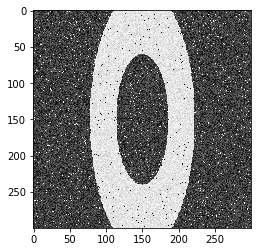

In [13]:
# assign random values from the normal distribution to the ellipse area
im[(rr>k) & (rr<n)] = np.random.normal(loc=210,scale=20,size=ss).astype(np.uint8)
plt.imshow(im,cmap=plt.cm.Greys_r);

### Saving image

Using the 'pillow' module, the created image can be saved to disk:
   - convert a numpy array to an image object
   - image format selection - 'pillow' supports various formats (see [Image file formats](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html))
   - create image file address
   - saving the image to disk

In [14]:
pil_im = Image.fromarray(im)
print(type(pil_im))

# %pwd - check the address of the current directory
cur_ad = %pwd
print(f'\nWorking directory address: {cur_ad}\n')

# save image in working directory under the name: 'test_ellipse.png'
pil_im.save('test_ellipse.png')

<class 'PIL.Image.Image'>

Working directory address: /home/u1/22_dydaktyka/05imProc



In [15]:
# %ls - magic command, check if the image has been saved to disk
%ls

im02xxx.ipynb  img_test/  lab1.ipynb  lab2.ipynb
im03xxx.ipynb  lab1.html  lab2.html   test_ellipse.png


### Image loading


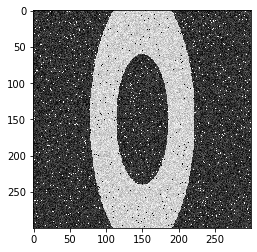

In [16]:
savedIm = Image.open('test_ellipse.png')
plt.imshow(savedIm);

# Pillow - simple geometric transformations

 - rotate
 - crop
 - resize
 
 ### Rotate

In [17]:
params = [{'angle':45},{'angle':45,'expand':True}]
print(f'rotate method parameters:\n{params}')

rotate method parameters:
[{'angle': 45}, {'angle': 45, 'expand': True}]


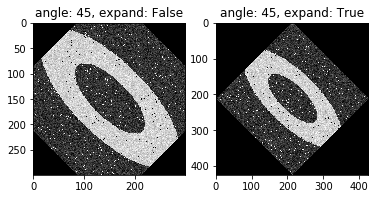

In [18]:
for i,par in enumerate(params,1):
    tmpIm = savedIm.rotate(**par)
    plt.subplot(1,2,i)  # 2 images: one row, two columns
    plt.imshow(tmpIm)
    plt.title(f'angle: {par["angle"]}, expand: {par.get("expand",False)}')
del tmpIm

### Crop
Image.crop(box=None)\
tuple of 4 coordinates: (x1,y1,x2,y2)

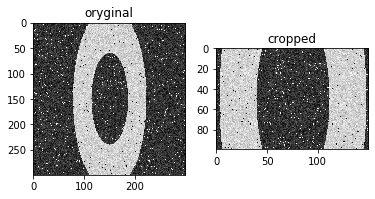

In [19]:
tit = ['oryginal','cropped']
tmpIm = savedIm.crop((75,100,225,200))
for i,img in enumerate([savedIm,tmpIm],1):
    plt.subplot(1,2,i)  # 2 images: one row, two columns
    plt.imshow(img)
    plt.title(tit[i-1])
del img

### Resize

Image.resize(size, resample=0)\
resize from 300x300 to 30x30

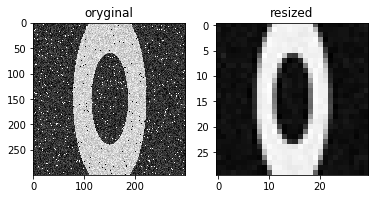

In [20]:
tit = ['oryginal','resized']
tmpIm = savedIm.resize((30,30))
for i,img in enumerate([savedIm,tmpIm],1):
    plt.subplot(1,2,i)  # 2 images: one row, two columns
    plt.imshow(img)
    plt.title(tit[i-1])
del img